In [ ]:
import pandas as pd
metrics = pd.read_parquet(
    "/home/martin/oar-deployments/2025-06-20-bench2/154640", engine="pyarrow"
)
metrics

,swhfuse_waiting_graph,swhfuse_get_blob,swhfuse_waiting_storage,swhfuse_not_found,swhfuse_waiting_objstorage
1750449336,11751.369970,2196.0,70.774036,1868.0,423.578045
1750449337,15995.916150,126.0,9.096622,72.0,69.734898
1750449337,27954.720378,260.0,26.317983,81.0,238.989870
1750449337,10209.373783,73.0,4.480461,50.0,31.261968
1750449337,7410.671156,81.0,4.114184,25.0,68.040690
...,...,...,...,...,...
1750454042,NaN,214.0,2.239673,210.0,7.095963
1750454043,NaN,216.0,1.583649,212.0,4.607298
1750454043,NaN,215.0,1.830582,215.0,NaN
1750454044,NaN,164.0,1.490623,164.0,NaN


In [19]:
xp_length = max(metrics.index) - min(metrics.index)
xp_length
xp_length/3600

1.3077777777777777

In [23]:
for c in metrics.columns:
        print(f"total {c}: " + str(metrics[c].sum()))
for c in metrics.columns:
    print(f"average per process {c}: " + str(metrics[c].sum()/2000))
accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed/xp_length}/s")

total swhfuse_waiting_graph: 206681953.256887
total swhfuse_get_blob: 50205986.0
total swhfuse_waiting_storage: 1237197.700409
total swhfuse_not_found: 36207182.0
total swhfuse_waiting_objstorage: 11706922.485720001
average per process swhfuse_waiting_graph: 103340.97662844349
average per process swhfuse_get_blob: 25102.993
average per process swhfuse_waiting_storage: 618.5988502045
average per process swhfuse_not_found: 18103.591
average per process swhfuse_waiting_objstorage: 5853.46124286
Actually accessed files = 13998804.0, ie. 2973.407816482583/s


In [12]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()

np.float64(0.7211726107719506)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 2000 processes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

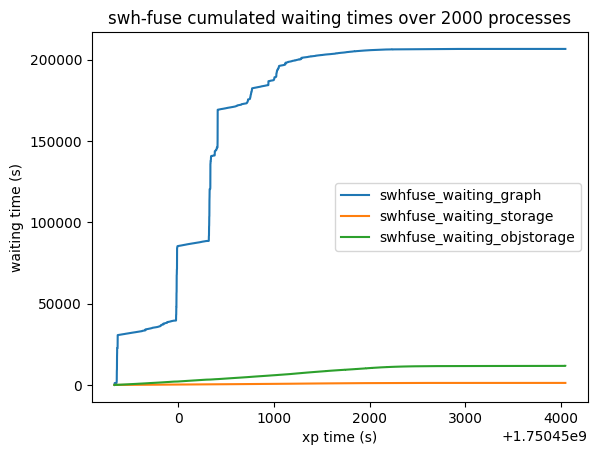

In [16]:
(metrics[
    ["swhfuse_waiting_graph", "swhfuse_waiting_storage", "swhfuse_waiting_objstorage"]
].sort_index().fillna(0.).cumsum() / 1000).plot(title="swh-fuse cumulated waiting times over 2000 processes", xlabel="xp time (s)", ylabel="waiting time (s)")

<Axes: title={'center': 'Number of object access/s'}>

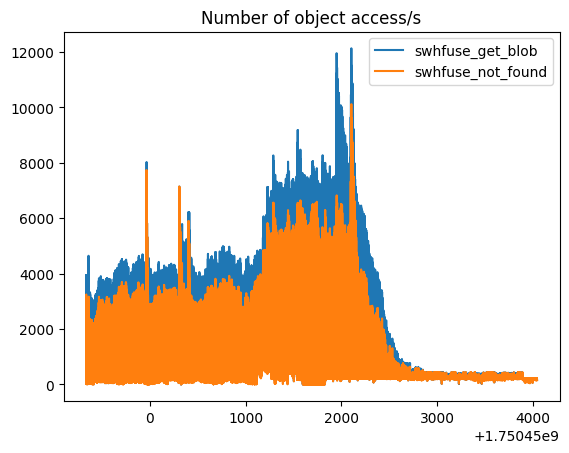

In [ ]:
metrics[["swhfuse_get_blob", "swhfuse_not_found"]].sort_index().fillna(0.0).plot(title="Number of object access/s")